In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
from datetime import datetime

In [2]:
T = 66
dt = 0.001
S = np.zeros(int(T / dt))
E = np.zeros(int(T / dt))
I = np.zeros(int(T / dt))
P = np.zeros(int(T / dt))
A = np.zeros(int(T / dt))
H = np.zeros(int(T / dt))
R = np.zeros(int(T / dt))
F = np.zeros(int(T / dt))

In [3]:
beta, l, beta1, k, p1, p2, gama_a, gama_i, gama_r, sigma_i, sigma_p, sigma_h = 2.55, 1.56, 7.65, 0.25, 0.58, 0.001, 0.94, 0.27, 0.5, 3.5, 1, 0.3

$$
\left\{\begin{array}{l}
\frac{d S}{d t}=-\beta \frac{I}{N} S-l \beta \frac{H}{N} S-\beta^{\prime} \frac{P}{N} S, \\
\frac{d E}{d t}=\beta \frac{I}{N} S+l \beta \frac{H}{N} S+\beta^{\prime} \frac{P}{N} S-\kappa E, \\
\frac{d I}{d t}=\kappa \rho_1 E-\left(\gamma_a+\gamma_i\right) I-\delta_i I, \\
\frac{d P}{d t}=\kappa \rho_2 E-\left(\gamma_a+\gamma_i\right) P-\delta_p P, \\
\frac{d A}{d t}=\kappa\left(1-\rho_1-\rho_2\right) E, \\
\frac{d H}{d t}=\gamma_a(I+P)-\gamma_r H-\delta_h H, \\
\frac{d R}{d t}=\gamma_i(I+P)+\gamma_r H, \\
\frac{d F}{d t}=\delta_i I+\delta_p P+\delta_h H,
\end{array}\right.
$$

In [4]:
N = int(11000000 / 250)
S[0] = N - 6
I[0] = 1
P[0] = 5
for t in range(1, int(T / dt)):
    S[t] = (-beta * S[t - 1] * I[t - 1] - l * beta * H[t - 1] * S[t - 1] - beta1 * P[t - 1] * S[t - 1] ) / N
    E[t] = -S[t] - k * E[t - 1]
    I[t] = k * p1 * E[t - 1] - (gama_a + gama_i) * I[t - 1] - sigma_i * I[t - 1]
    P[t] = k * p2 * E[t - 1] - (gama_a + gama_i) * P[t - 1] - sigma_p * P[t - 1]
    A[t] = k * (1 - p1 - p2) * E[t - 1]
    H[t] = gama_a * (I[t - 1] + P[t - 1]) - gama_r * H[t - 1] - sigma_h * H[t - 1]
    R[t] = gama_i * (I[t - 1] + P[t - 1]) + gama_r * H[t - 1]
    F[t] = sigma_i * I[t - 1] + sigma_p * P[t - 1] + sigma_h * H[t - 1]
    
    
    S[t] = S[t - 1] + S[t] * dt;
        E[t] = E[t - 1] + E[t] * dt;
        I[t] = I[t - 1] + I[t] * dt;
        P[t] = P[t - 1] + P[t] * dt;
        A[t] = A[t - 1] + A[t] * dt;
        H[t] = H[t - 1] + H[t] * dt;
        R[t] = R[t - 1] + R[t] * dt;
        F[t] = F[t - 1] + F[t] * dt;
    
    
    
    for chump in (S, E, I, P, A, H, R, F):
        chump[t] = chump[t - 1] + chump[t] * dt

In [6]:
for i in range(66):
    print((I[int(i / dt)]), end=" ")
    if i % 10 == 0:
        print("")

1.0 
0.5037319667951344 0.647954782603337 0.677985512878045 0.6780641068339128 0.6688945213959381 0.6566305665951986 0.6434028721977446 0.6299902338063776 0.616680405733241 0.603578279202109 
0.5907201624641927 0.5781166131635912 0.5657685425806137 0.5536732761228759 0.5418268346196877 0.5302247930233069 0.5188626035219145 0.5077357169842656 0.4968396284516464 0.4861698940094814 
0.4757221368606492 0.46549204931208754 0.45547539320307606 0.44566799972856636 0.4360657690178255 0.4266646696053005 0.4174607378464526 0.4084500772995884 0.39962885808267024 0.39099331620956834 
0.38253975290840875 0.37426453392397646 0.36616408880582124 0.3582349101835369 0.3504735530305997 0.34287663391807294 0.3354408302593778 0.32816287954733847 0.3210395785845692 0.3140677827082839 
0.30724440501049904 0.30056641555458974 0.2940308405890768 0.287634761759495 0.28137531531913657 0.275249691339414 0.2692551329205648 0.2633889354033488 0.25764844558237493 0.2520310609216439 
0.24653422877286107 0.2411554455

In [7]:
LC = [6, 12, 19, 25, 31, 38, 44, 60, 80, 131, 131, 259, 467, 688, 776, 1776, 1460, 1739, 1984, 2101, 2590, 2827, 3233, 3892, 3697, 3151, 3387, 2653, 2984, 2473, 2022, 1820, 1998, 1506, 1278, 2051, 1772, 1891, 399, 894, 397, 650, 415, 518, 412, 439, 441, 435, 579, 206, 130, 120, 143, 146, 102, 46, 45, 20, 31, 26, 11 , 18, 27, 29, 39, 39]

In [8]:
for i in I[::int(1/dt)]:
    print(int(i))

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [9]:
len(I[::int(1/dt)])

66

In [10]:
def plotting_2(x, y, name):
    fig, ax = plt.subplots()
    plt.title(name, color = 'Orange', fontsize=15)
    ax.set_facecolor('#232323')
    ax.plot(x, color = 'red')
    ax.plot(y, color = 'yellow')
    ax.tick_params(labelcolor='tab:orange')
    plt.show()

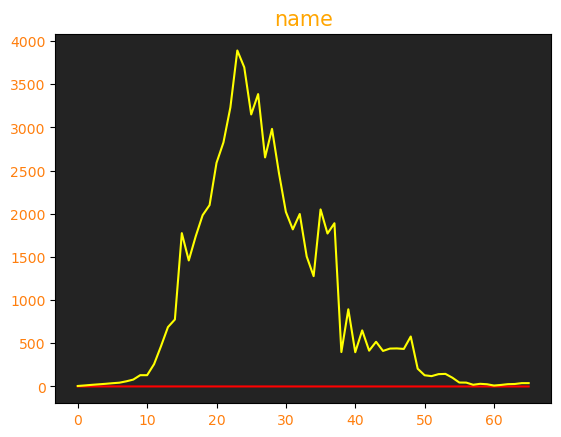

In [11]:
plotting_2(I[::int(1/dt)], LC, "name")